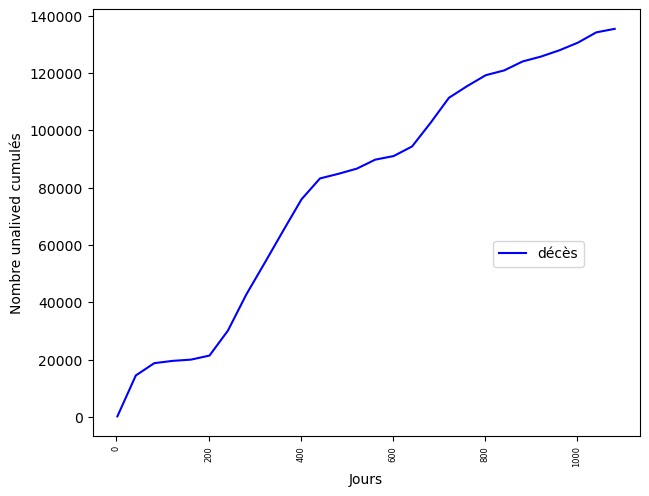

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('reduced_covid_sexe.csv')

pd.set_option('display.max_colwidth', None)
#on vire les titres qui interfère
df = df[::][2::]

df['Unnamed: 0'] = df['Unnamed: 0'].apply(pd.to_datetime)

fig, axe1 = plt.subplots()
axe1.plot(df.index[::40], df
         ['dc'][::40], label = 'décès', color = 'blue')
fig.tight_layout()
axe1.set_xlabel('Jours')
axe1.set_ylabel("Nombre unalived cumulés")
axe1.tick_params(axis='x', labelrotation = 90, labelsize=6)
fig.legend(bbox_to_anchor=(0.9, 0.5))

In [48]:
#Split train/test
date_train, date_test, dc_train, dc_test = train_test_split(df.index,df
         ['dc'])
print(dc_train.shape)
#on ajoute un axe pour avoir les bonnes dimensions
dc_train = dc_train[:, np.newaxis]
dc_test = dc_test[:, np.newaxis]
date_train = date_train[:, np.newaxis]
date_test = date_test[:, np.newaxis]
print(dc_train.shape)

(831,)
(831, 1)


C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\640024496.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_train = dc_train[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\640024496.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_test = dc_test[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\640024496.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  date_train = date_train[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\640024496.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, N

 RMSE_train=8678.412587575369, R²=0.9581416836913861 
 RMSE_test=8715.210502552702,  R²=0.9534809990743291


Text(0.5, 1.0, 'Train OSL')

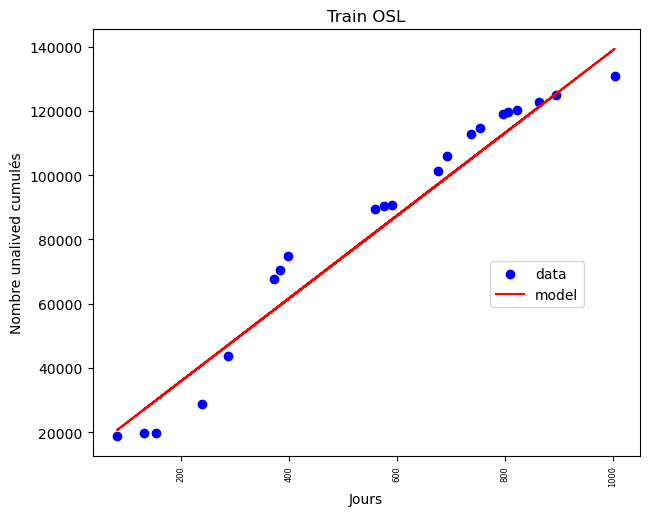

In [49]:
#OSL
model = LinearRegression()
model.fit(date_train, dc_train)
res_train = model.predict(date_train)
res_test= model.predict(date_test)
RMSE_train = metrics.mean_squared_error(dc_train, res_train, squared= False)
RMSE_test = metrics.mean_squared_error(dc_test, res_test, squared= False)
print(f' {RMSE_train=}, R²={model.score(date_train, dc_train)} \n {RMSE_test=},  R²={model.score(date_test, dc_test)}')

fig, axe1 = plt.subplots()
axe1.scatter(date_train[::40],
         dc_train[::40], label = 'data', color = 'blue')
axe1.plot(date_train[::40], res_train[::40], label = 'model', color = 'red')
fig.tight_layout()
axe1.set_xlabel('Jours')
axe1.set_ylabel("Nombre unalived cumulés")
axe1.tick_params(axis='x', labelrotation = 90, labelsize=6)
fig.legend(bbox_to_anchor=(0.9, 0.5))
axe1.set_title('Train OSL')

on va split les données par années

In [50]:
#premier segment
date_train1, date_test1, dc_train1, dc_test1 = train_test_split(df.index[:365],df
         ['dc'][:365])
dc_train1 = dc_train1[:, np.newaxis]
dc_test1 = dc_test1[:, np.newaxis]
date_train1 = date_train1[:, np.newaxis]
date_test1 = date_test1[:, np.newaxis]
model1 = LinearRegression()
model1.fit(date_train1, dc_train1)
res_train1 = model1.predict(date_train1)
res_test1= model1.predict(date_test1)
RMSE_train1 = metrics.mean_squared_error(dc_train1, res_train1, squared= False)
RMSE_test1 = metrics.mean_squared_error(dc_test1, res_test1, squared= False)
print(f' {RMSE_test1=}, R²={model1.score(date_train1, dc_train1)} \n {RMSE_train1=},  R²={model1.score(date_test1, dc_test1)}')


 RMSE_test1=5347.144559740887, R²=0.8570178644817644 
 RMSE_train1=6264.3871155488105,  R²=0.892031765218543


C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\452198911.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_train1 = dc_train1[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\452198911.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_test1 = dc_test1[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\452198911.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  date_train1 = date_train1[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\452198911.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `ob

In [51]:
#second segment
date_train2, date_test2, dc_train2, dc_test2 = train_test_split(df.index[365:730],df
         ['dc'][365:730])
dc_train2 = dc_train2[:, np.newaxis]
dc_test2 = dc_test2[:, np.newaxis]
date_train2 = date_train2[:, np.newaxis]
date_test2 = date_test2[:, np.newaxis]
model2 = LinearRegression()
model2.fit(date_train2, dc_train2)
res_train2 = model2.predict(date_train2)
res_test2 = model2.predict(date_test2)
RMSE_train2 = metrics.mean_squared_error(dc_train2, res_train2, squared= False)
RMSE_test2 = metrics.mean_squared_error(dc_test2, res_test2, squared= False)
print(f' {RMSE_test2=}, R²={model2.score(date_train2, dc_train2)} \n {RMSE_train2=},  R²={model2.score(date_test2, dc_test2)}')

 RMSE_test2=3040.838525052455, R²=0.9162524764669758 
 RMSE_train2=2975.3012800858264,  R²=0.9213878192233574


C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\545317519.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_train2 = dc_train2[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\545317519.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_test2 = dc_test2[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\545317519.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  date_train2 = date_train2[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\545317519.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `ob

In [52]:
#troisième segment
date_train3, date_test3, dc_train3, dc_test3 = train_test_split(df.index[730:],df
         ['dc'][730:])
dc_train3 = dc_train3[:, np.newaxis]
dc_test3 = dc_test3[:, np.newaxis]
date_train3 = date_train3[:, np.newaxis]
date_test3 = date_test3[:, np.newaxis]
#print(type(dc_train3))
model3 = LinearRegression()
model3.fit(date_train3, dc_train3)
res_train3 = model3.predict(date_train3)
res_test3 = model3.predict(date_test3)
RMSE_train3 = metrics.mean_squared_error(dc_train3, res_train3, squared= False)
RMSE_test3 = metrics.mean_squared_error(dc_test3, res_test3, squared= False)
print(f' {RMSE_test3=}, R²={model3.score(date_train3, dc_train3)} \n {RMSE_train3=},  R²={model3.score(date_test3, dc_test3)}')

 RMSE_test3=620.0018034280159, R²=0.9905131286793021 
 RMSE_train3=662.4128857355744,  R²=0.9913611736564126


C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\2946810873.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_train3 = dc_train3[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\2946810873.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_test3 = dc_test3[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\2946810873.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  date_train3 = date_train3[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\2946810873.py:7: FutureWarning: Support for multi-dimensional indexing (e.g.

Text(0.5, 1.0, 'Train OSL')

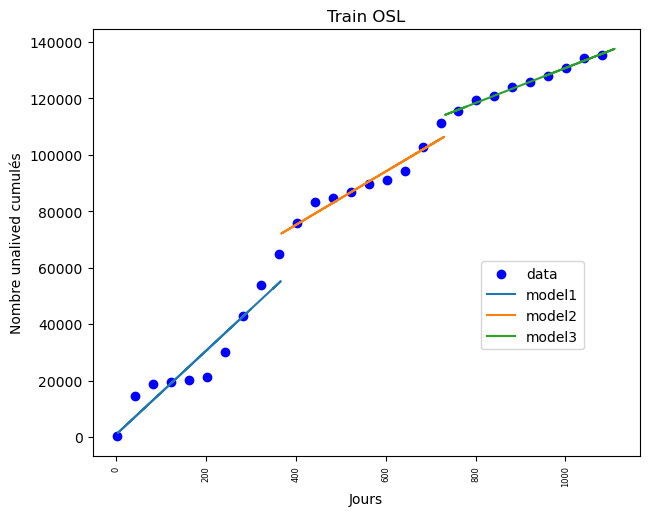

In [53]:
#Tracé
fig, axe1 = plt.subplots()
axe1.scatter(df.index[::40],
         df['dc'][::40], label = 'data', color = 'blue')
axe1.plot(date_train1, res_train1, label = 'model1' )
axe1.plot(date_train2, res_train2, label = 'model2')
axe1.plot(date_train3, res_train3, label = 'model3')
fig.tight_layout()
axe1.set_xlabel('Jours')
axe1.set_ylabel("Nombre unalived cumulés")
axe1.tick_params(axis='x', labelrotation = 90, labelsize=6)
fig.legend(bbox_to_anchor=(0.9, 0.5))
axe1.set_title('Train OSL')

 RMSE_test=11934.453076820138, R²=0.9153773660158891 
 RMSE_train=12154.884415547149,  R²=0.9204115464483805


C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\1598289709.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_train = dc_train[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\1598289709.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_test = dc_test[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\1598289709.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  date_train = date_train[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\1598289709.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[

Text(0.5, 1.0, 'Decision Tree Split')

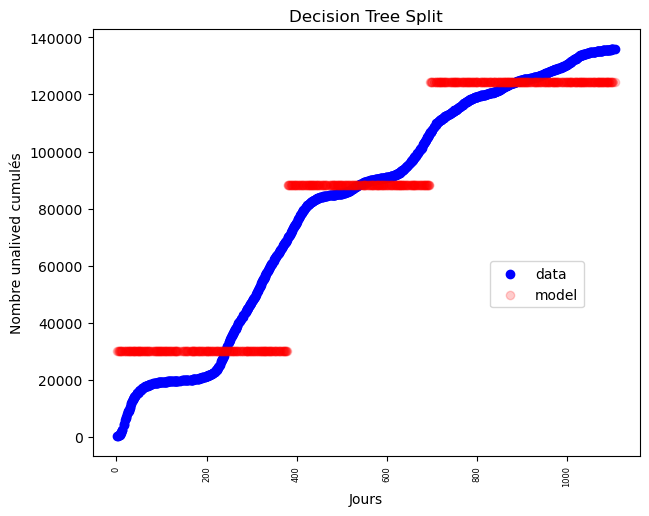

In [54]:
#Avec decision tree 
date_train, date_test, dc_train, dc_test = train_test_split(df.index,df
         ['dc'])
dc_train = dc_train[:, np.newaxis]
dc_test = dc_test[:, np.newaxis]
date_train = date_train[:, np.newaxis]
date_test = date_test[:, np.newaxis]
Dtree_model = DecisionTreeRegressor(max_leaf_nodes=3, min_samples_leaf=50)

Dtree_model.fit(date_train, dc_train)
res_train = Dtree_model.predict(date_train)
res_test= Dtree_model.predict(date_test)
RMSE_train = metrics.mean_squared_error(dc_train, res_train, squared= False)
RMSE_test = metrics.mean_squared_error(dc_test, res_test, squared= False)
print(f' {RMSE_test=}, R²={Dtree_model.score(date_train, dc_train)} \n {RMSE_train=},  R²={Dtree_model.score(date_test, dc_test)}')

fig, axe1 = plt.subplots()
axe1.scatter(date_train,
         dc_train, label = 'data', color = 'blue')
axe1.scatter(date_train, res_train, label = 'model', color = 'red', alpha=0.2)
fig.tight_layout()
axe1.set_xlabel('Jours')
axe1.set_ylabel("Nombre unalived cumulés")
axe1.tick_params(axis='x', labelrotation = 90, labelsize=6)
fig.legend(bbox_to_anchor=(0.9, 0.5))
axe1.set_title('Decision Tree Split')

[Text(0.4, 0.8333333333333334, 'x[0] <= 379.5\nsquared_error = 1745882965.343\nsamples = 831\nvalue = 82652.998'),
 Text(0.2, 0.5, 'squared_error = 323438868.385\nsamples = 277\nvalue = 30050.542'),
 Text(0.6, 0.5, 'x[0] <= 696.0\nsquared_error = 381841224.821\nsamples = 554\nvalue = 108954.226'),
 Text(0.4, 0.16666666666666666, 'squared_error = 58226389.539\nsamples = 238\nvalue = 88279.084'),
 Text(0.8, 0.16666666666666666, 'squared_error = 61147159.94\nsamples = 316\nvalue = 124526.009')]

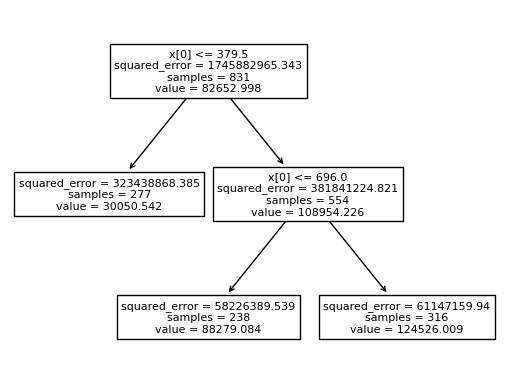

In [55]:
#visu of decision tree
from sklearn import tree
tree.plot_tree(Dtree_model)

In [56]:
limit = Dtree_model.tree_.threshold
# HYPOTHESE /!\ les thresholds sont arbritrairements -2 là où ça ne s'applique pas (apparement).
Split = []
for i in range(len(limit)):
    if limit[i] != -2:
        Split.append(limit[i])
Split.sort()
Split

[379.5, 696.0]

In [57]:
''' Pour faire l'extraction correctement, il faudrait parcourir l'arbre, comme indiqué dans la doc : '''

# n_nodes = Dtree_model.tree_.node_count
# children_left = Dtree_model.tree_.children_left
# children_right = Dtree_model.tree_.children_right
# feature = Dtree_model.tree_.feature
# threshold = Dtree_model.tree_.threshold
# values = Dtree_model.tree_.value

# node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
# is_leaves = np.zeros(shape=n_nodes, dtype=bool)
# stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
# while len(stack) > 0:
#     # `pop` ensures each node is only visited once
#     node_id, depth = stack.pop()
#     node_depth[node_id] = depth

#     # If the left and right child of a node is not the same we have a split
#     # node
#     is_split_node = children_left[node_id] != children_right[node_id]
#     # If a split node, append left and right children and depth to `stack`
#     # so we can loop through them
#     if is_split_node:
#         stack.append((children_left[node_id], depth + 1))
#         stack.append((children_right[node_id], depth + 1))
#     else:
#         is_leaves[node_id] = True

# for i in range(n_nodes):
#     if is_leaves[i]:
#         continue

#     else:
#         Split.append(threshold[i])
# Split.sort()

" Pour faire l'extraction correctement, il faudrait parcourir l'arbre, comme indiqué dans la doc : "

In [58]:
#Extraction des index correspodants aux thresholds
df_split = df.iloc[Split]
idx = df_split.index
idx = idx.insert(0, 0) #on rajoute un 0 au début pour séparer plus facilement
idx = idx.to_list()
idx

[0, 381, 698]

 // Modèle 0 // 
 TRAIN : RMSE = 6228.667720945958, R²=0.8780734332850526 
 TEST : RMSE = 6600.068350645078,  R²=0.8706601090040313
 // Modèle 1 // 
 TRAIN : RMSE = 2095.463247810601, R²=0.9251783719675477 
 TEST : RMSE = 2145.782704209481,  R²=0.9122444592248379
 // Modèle 2 // 
 TRAIN : RMSE = 973.3047521638425, R²=0.984672964847767 
 TEST : RMSE = 944.0357344765542,  R²=0.983548597791999


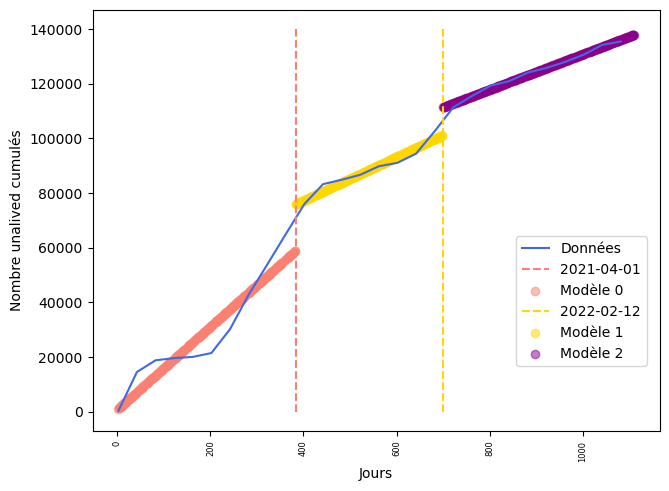

In [59]:
#on trace en fittant pour chaque section
fig, axe1 = plt.subplots()
fig.tight_layout()
axe1.set_xlabel('Jours')
axe1.set_ylabel("Nombre unalived cumulés")
axe1.tick_params(axis='x', labelrotation = 90, labelsize=6)
axe1.plot(df.index[::40], df
         ['dc'][::40], label = f'Données', color = 'royalblue')
colors = ['salmon', 'gold', 'darkmagenta', 'burlywood', 'mediumseagreen', 'violet', 'paleturquoise', 'steelblue', 'hotpink']

for i in range(len(idx)):
        try:
                date_train, date_test, dc_train, dc_test = train_test_split(df.index[(idx[i]):(idx[(i+1)])],df
                ['dc'][(idx[i]):(idx[i+1])])
                etiquette = df["Unnamed: 0"][idx[i+1]]
                etiquette = pd.to_datetime(etiquette, format="%M/%Y", exact=True, yearfirst=True)
                axe1.vlines(df.index[(idx[i+1])],0, 14e4, color=colors[i], 
                           linestyles= 'dashed', label = etiquette.date())
        except IndexError: #pour la dernière section
                date_train, date_test, dc_train, dc_test = train_test_split(df.index[(idx[i]):],df
        ['dc'][(idx[i]):])
               

        date_train = np.array(date_train)
        date_train = date_train[:, np.newaxis]
        date_test = np.array(date_test)
        date_test = date_test[:, np.newaxis]
        dc_train = np.array(dc_train)
        dc_train = dc_train[:, np.newaxis]
        dc_test = np.array(dc_test)
        dc_test = dc_test[:, np.newaxis]
        model_comp = LinearRegression()
        model_comp.fit(date_train, dc_train)
        res_train = model_comp.predict(date_train)
        res_test = model_comp.predict(date_test)
        RMSE_train = metrics.mean_squared_error(dc_train, res_train, squared= False)
        RMSE_test = metrics.mean_squared_error(dc_test, res_test, squared= False)
        print(f' // Modèle {i} // \n TRAIN : RMSE = {RMSE_train}, R²={model_comp.score(date_train, dc_train)} \n TEST : RMSE = {RMSE_test},  R²={model_comp.score(date_test, dc_test)}')
        axe1.scatter(date_train, res_train, label = f'Modèle {i}', color = colors[i], alpha=0.5)
        

fig.legend(bbox_to_anchor=(0.95, 0.5))

In [60]:
#SGD
#Split train/test
date_train, date_test, dc_train, dc_test = train_test_split(df.index,df
         ['dc'])
print(dc_train.shape)
#on ajoute un axe pour avoir les bonnes dimensions
dc_train = dc_train[:, np.newaxis]
dc_test = dc_test[:, np.newaxis]
date_train = date_train[:, np.newaxis]
date_test = date_test[:, np.newaxis]
print(dc_train.shape)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
# SGD = SGDRegressor(max_iter=1000, tol=1e-2)
GBR = GradientBoostingRegressor()



(831,)
(831, 1)


C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\102502996.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_train = dc_train[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\102502996.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dc_test = dc_test[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\102502996.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  date_train = date_train[:, np.newaxis]
C:\Users\simplet\AppData\Local\Temp\ipykernel_12636\102502996.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, 

 SGD :  RMSE_test_SGD=8475.660966654008, R²=0.9570139195241374 
 GBR :  RMSE_test_GBR=302.01270152813527, R²=0.9999454203041495


c:\Users\simplet\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\simplet\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Train SGD VS GBR')

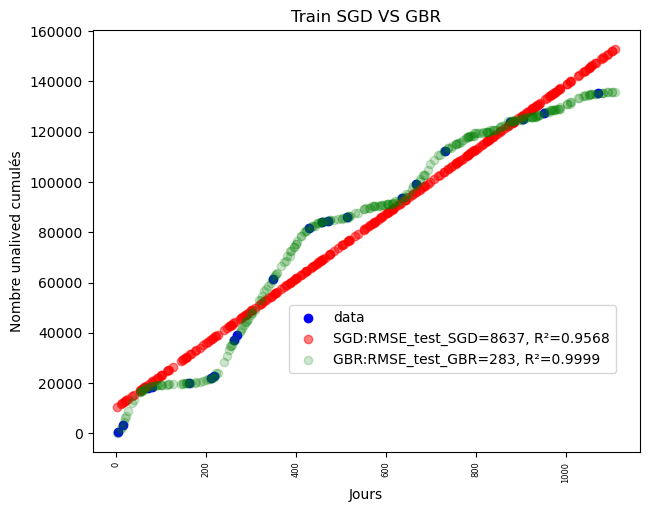

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SGD = make_pipeline(StandardScaler(),
                 SGDRegressor(max_iter=1000, tol=1e-3))

SGD.fit(date_train, dc_train)
GBR.fit(date_train, dc_train)
res_test_SGD= SGD.predict(date_test)
res_test_GBR = GBR.predict(date_test)

RMSE_test_SGD = metrics.mean_squared_error(dc_test, res_test_SGD, squared= False)
RMSE_test_GBR = metrics.mean_squared_error(dc_test, res_test_GBR, squared= False)

print(f' SGD :  {RMSE_test_SGD=}, R²={SGD.score(date_test, dc_test)} \n GBR :  {RMSE_test_GBR=}, R²={GBR.score(date_test, dc_test)}')

fig, axe1 = plt.subplots()
axe1.scatter(date_train[::40],
         dc_train[::40], label = 'data', color = 'blue')
axe1.scatter(date_test, res_test_SGD, label = 'SGD:RMSE_test_SGD=8637, R²=0.9568', color = 'red', alpha = 0.5)
axe1.scatter(date_test, res_test_GBR, label = 'GBR:RMSE_test_GBR=283, R²=0.9999', color = 'green', alpha=0.2)

fig.tight_layout()
axe1.set_xlabel('Jours')
axe1.set_ylabel("Nombre unalived cumulés")
axe1.tick_params(axis='x', labelrotation = 90, labelsize=6)
fig.legend(bbox_to_anchor=(0.95, 0.4))
axe1.set_title('Train SGD VS GBR')